In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SHIBUSDT_5m_1h-pump05_210510_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2021-05-10 11:00:00,0.000014,0.000050,0.000014,0.000027,2.437435e+12,133271.0,1.412094e+12,4.920159e+07,0,...,NaN,1.377193,1.328889,0.579336,NaN,NaN,NaN,0.158672,NaN,0.344828
1,2021-05-10 11:05:00,0.000027,0.000045,0.000026,0.000038,1.919589e+12,92865.0,1.094052e+12,3.933467e+07,0,...,NaN,1.325260,0.498401,0.569941,NaN,NaN,NaN,0.139881,NaN,0.344828
2,2021-05-10 11:10:00,0.000037,0.000045,0.000035,0.000039,1.561803e+12,89312.0,8.366565e+11,3.371458e+07,0,...,NaN,1.153775,0.250254,0.535699,NaN,NaN,NaN,0.071398,NaN,0.344828
3,2021-05-10 11:15:00,0.000039,0.000039,0.000031,0.000033,1.237097e+12,70869.0,5.370440e+11,1.906077e+07,0,...,NaN,0.767147,0.257283,0.434116,NaN,NaN,NaN,-0.131768,NaN,0.344828
4,2021-05-10 11:20:00,0.000033,0.000034,0.000030,0.000034,1.035440e+12,51351.0,5.209895e+11,1.711150e+07,0,...,NaN,1.012711,0.125329,0.503158,NaN,NaN,NaN,0.006315,NaN,0.344828


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SHIBUSDT"
start_date = "2021-05-10"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(            open      high       low     close        volume  num_trades  \
 0       0.000014  0.000050  0.000014  0.000027  2.437435e+12    133271.0   
 1       0.000027  0.000045  0.000026  0.000038  1.919589e+12     92865.0   
 2       0.000037  0.000045  0.000035  0.000039  1.561803e+12     89312.0   
 3       0.000039  0.000039  0.000031  0.000033  1.237097e+12     70869.0   
 4       0.000033  0.000034  0.000030  0.000034  1.035440e+12     51351.0   
 ...          ...       ...       ...       ...           ...         ...   
 392025  0.000019  0.000019  0.000019  0.000019  2.434019e+09      2135.0   
 392026  0.000019  0.000019  0.000019  0.000019  9.363030e+08       661.0   
 392027  0.000019  0.000019  0.000019  0.000019  4.760205e+09      1662.0   
 392028  0.000019  0.000019  0.000019  0.000019  4.437144e+09      2322.0   
 392029  0.000019  0.000019  0.000019  0.000019  1.113180e+09       997.0   
 
         taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.8483


np.float64(0.8483209784002503)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.8483
AUC-ROC Score: 0.9936

Overall Metrics:
Accuracy:  0.9816
Precision: 0.9811
Recall:    0.9816
F1-Score:  0.9798

Class 0 Metrics:
Precision: 0.9826
Recall:    0.9984
F1-Score:  0.9904

Class 1 Metrics:
Precision: 0.9484
Recall:    0.6208
F1-Score:  0.7504

Using raw probabilities
Classification threshold: 0.8483
{'accuracy': 0.9815993519268603, 'precision': 0.9810732075810046, 'recall': 0.9815993519268603, 'f1': 0.9797519193042064, 'auc_roc': np.float64(0.9936216399879191), 'optimal_threshold': np.float64(0.8483209784002503), 'precision_0': 0.9825962570032185, 'recall_0': 0.9984253875968992, 'f1_0': 0.9904475818564134, 'precision_1': 0.9484126984126984, 'recall_1': 0.6207792207792208, 'f1_1': 0.750392464678179}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


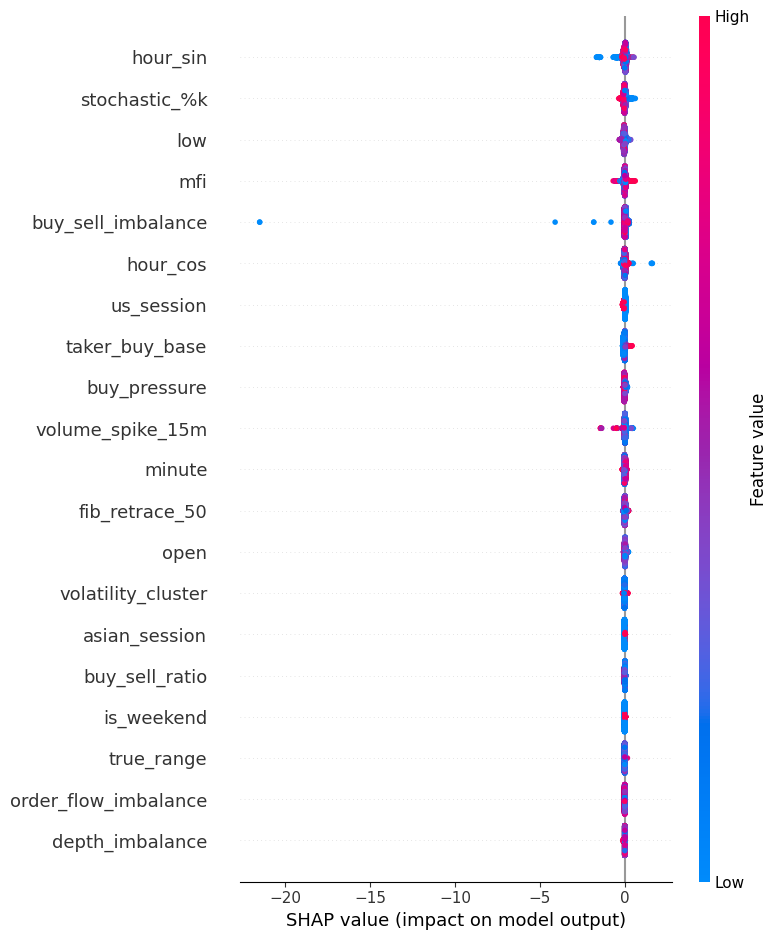


📈 Calculating feature importance...


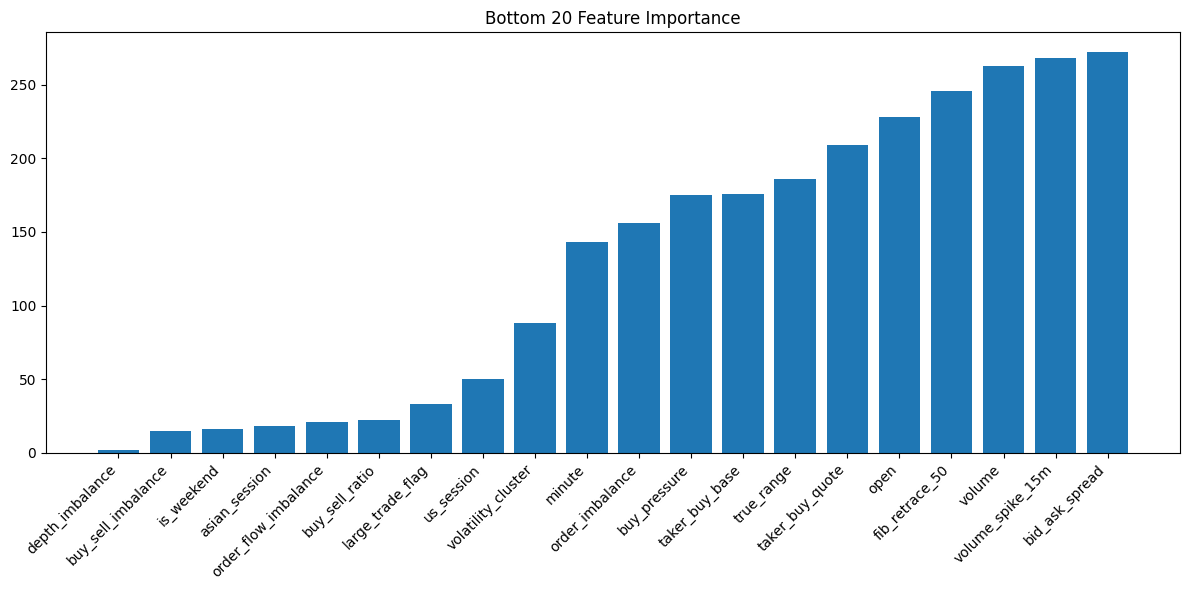

Found existing experiment
Identical result already exists for experiment ID: 19
Logged feature importance for experiment ID: 19


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="5m",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="5m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()